# 5.2-using-convnets-with-small-datasets

In [16]:
import os, shutil
%matplotlib inline

## Building our network

In [1]:
from keras import models, layers

Using TensorFlow backend.
/home/hongta/anaconda3/envs/rcnn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## Data Preprocessing

  - Read picture files
  - Decode the JPEG content to RGB grides of pixels
  - Convert these into floating point tensors.
  - Rescale the pixel values (from [0, 255], to [0, 1]

In [23]:
train_dir = './dataset/dogs_vs_cats/sample/train'
validation_dir = './dataset/dogs_vs_cats/sample/valid'
train_cats_dir = './dataset/dogs_vs_cats/sample/train/cats'

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode="binary")

Found 5000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [11]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 213ms/step - loss: 0.6941 - acc: 0.5295 - val_loss: 0.6945 - val_acc: 0.4660
Epoch 2/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6554 - acc: 0.6275 - val_loss: 0.6118 - val_acc: 0.6810
Epoch 3/30
100/100 [==============================] - 16s 165ms/step - loss: 0.6306 - acc: 0.6560 - val_loss: 0.5998 - val_acc: 0.6840
Epoch 4/30
100/100 [==============================] - 16s 159ms/step - loss: 0.5992 - acc: 0.6920 - val_loss: 0.5771 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5857 - acc: 0.6890 - val_loss: 0.5740 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5504 - acc: 0.7145 - val_loss: 0.6290 - val_acc: 0.6350
Epoch 7/30
100/100 [==============================] - 16s 159ms/step - loss: 0.5500 - acc: 0.7275 - val_loss: 0.5856 - val_acc: 0.6690
Epoch 8/30
100/100 [==============================] - 1

In [12]:
model.save('dogs_vs_cats_small1.h5')

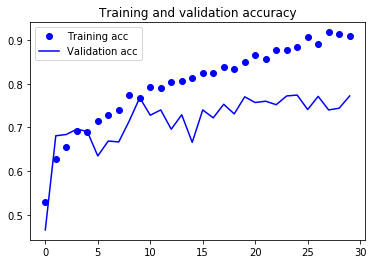

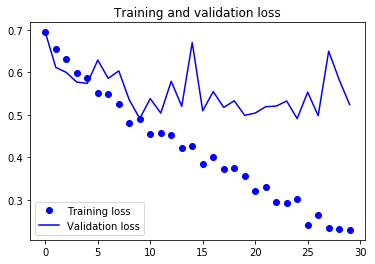

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using data augmentation

In [19]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

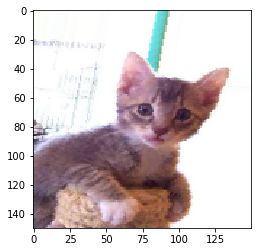

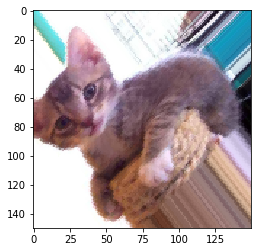

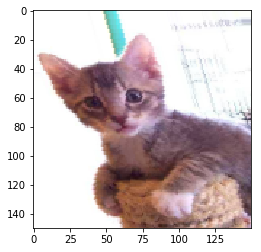

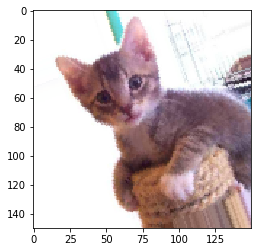

In [25]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

# convert image to a numpy array
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Note that the validation data should not be augmentated!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), #all images will be resized to 150x150
                                                    batch_size=32,
                                                    class_mode='binary' # since we use binary_crossentropy loss we need binary labels
                                                   )

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 5000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 38s 381ms/step - loss: 0.4293 - acc: 0.7966 - val_loss: 0.4109 - val_acc: 0.8095
Epoch 2/30
100/100 [==============================] - 35s 353ms/step - loss: 0.4391 - acc: 0.7966 - val_loss: 0.4378 - val_acc: 0.7948
Epoch 3/30
100/100 [==============================] - 34s 345ms/step - loss: 0.4394 - acc: 0.7912 - val_loss: 0.4130 - val_acc: 0.8248
Epoch 4/30
100/100 [==============================] - 35s 351ms/step - loss: 0.4160 - acc: 0.8131 - val_loss: 0.4541 - val_acc: 0.8043
Epoch 5/30
100/100 [==============================] - 34s 345ms/step - loss: 0.4416 - acc: 0.8034 - val_loss: 0.4248 - val_acc: 0.8107
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.4532 - acc: 0.7931 - val_loss: 0.4226 - val_acc: 0.8012
Epoch 7/30
100/100 [==============================] - 35s 347ms/step - loss: 0.4387 - acc: 0.8022 - val_los

In [37]:
model.save('cats_and_dogs_small_2.h5')

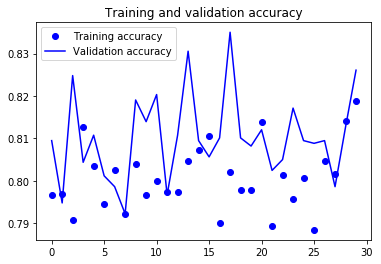

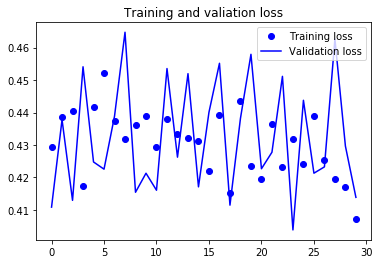

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and valiation loss')
plt.legend()

plt.show()